In [1]:
# Importing all the necessary libraries
# Data wrangling and Statistical testing modules
import pandas as pd
import numpy as np
# import statsmodels

# import os

# Data visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Suppressing warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
df_allchannelsalesunits = pd.read_excel('Salesunit-Combined.xlsx')

In [5]:
df_allchannelsalesunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236532 entries, 0 to 236531
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Year            236532 non-null  int64         
 1   Month           236532 non-null  int64         
 2   Record Date     236532 non-null  datetime64[ns]
 3   Sku #           204138 non-null  object        
 4   Sku             236532 non-null  object        
 5   Merged Sku      236508 non-null  object        
 6   Launch Date     204138 non-null  float64       
 7   Classification  204138 non-null  object        
 8   Subclass        204138 non-null  object        
 9   Collection      204138 non-null  object        
 10  Channel         236532 non-null  int64         
 11  Units           236532 non-null  float64       
 12  COGS            204138 non-null  float64       
 13  MSRP            204138 non-null  float64       
 14  Line Edit       204138 non-null  obj

In [3]:
df_allchannelsalesunits.sample(5)

,Year,Month,Record Date,Sku #,Sku,Merged Sku,Launch Date,Classification,Subclass,Collection,Channel,Units,COGS,MSRP,Line Edit,Region Name
17306,2018,3,2018-03-01,Sku 249,GOLD-MIRROR-HANDLE,GOLD-MIRROR-HANDLE,2016.0,Curated Gift,Curated Gift,Curated,3,0.0,11.405000,45.0,1 Shot,Northeast
99418,2018,5,2018-05-01,Sku 36,GOLDSPUN-LIP-BALM,GOLDSPUN-LIP-BALM,2016.0,Core,Lip,Lip Treatment,2,46.0,4.729118,30.0,1 Shot,Unassigned
36735,2019,1,2019-01-01,Sku 272,OILY-RITUAL-KIRI,OILY-RITUAL-KIRI,2016.0,Core Set,Set,Pores,3,0.0,67.100000,610.0,1 Shot,Unassigned
23948,2018,9,2018-09-01,Sku 22,SERUM-EYE,SERUM-EYE,2016.0,Core,Eye,Firming,3,0.0,4.058211,85.0,On Going,Southern
133152,2019,10,2019-10-01,Sku 249,GOLD-MIRROR-HANDLE,GOLD-MIRROR-HANDLE,2016.0,Curated Gift,Curated Gift,Curated,7,0.0,11.405000,45.0,1 Shot,Unassigned


In [4]:
combined_df = df_allchannelsalesunits.copy(deep=True)

In [280]:
(combined_df['COGS'].sum()/1290733317)*100

13.613224914443913

In [281]:
# AUR
(1290733317/26232097.617269002)

49.204350175576124

In [7]:
# Calculating the Net Sales Made:
print(f"Net Sales: {combined_df['Units'].sum()}")

Net Sales: 26232097.617269002


In [8]:
# Renaming the COGS column to COGS Per Sku
combined_df.rename(columns={'COGS':'COGS Per Sku'}, inplace=True)

In [9]:
combined_df.sample(5)

,Year,Month,Record Date,Sku #,Sku,Merged Sku,Launch Date,Classification,Subclass,Collection,Channel,Units,COGS Per Sku,MSRP,Line Edit,Region Name
145336,2017,12,2017-12-01,Sku 243,DP-POWDER-DUO,DP-POWDER-DUO,2016.0,CHANNEL 3,Powder,Kyoto Cleanse,6,0.0,8.580000,78.0,1 Shot,Western
218912,2019,2,2019-02-01,Sku 156,GT-POWDER,GT-POWDER,2016.0,Core,Powder,Ageless,1,0.0,7.120556,65.0,On Going,Southern
131301,2019,3,2019-03-01,Sku 229,CRTD-TEA-SET,CRTD-TEA-SET,2016.0,Curated Gift,Curated Gift,Curated,7,0.0,112.815000,295.0,1 Shot,Southern
98571,2018,5,2018-05-01,Sku 46,EYE-CREAM,EYE-CREAM,2016.0,Core,Eye,Ageless,2,20.0,7.793333,135.0,On Going,Northeast
15680,2018,8,2018-08-01,Sku 242,DP-POWDER,DP-POWDER-V2,2016.0,Core,Powder,Kyoto Cleanse,3,0.0,7.470312,65.0,On Going,International


References:
1. https://www.selleraccountant.com/how-do-i-calculate-cogs-in-my-amazon-business/
2. https://www.wallstreetprep.com/knowledge/cogs-cost-of-goods-sold/

In [10]:
# Calculating the Total COGS:
combined_df['COGS'] = combined_df['Units']*combined_df['COGS Per Sku']

In [15]:
# Calculating the Total COGS:
print(f"Total Cost of Goods Sold (COGS): {combined_df['COGS'].sum()}")

Total Cost of Goods Sold (COGS): 175710429.48887235


In [21]:
# Converting the date-time datatype to period type
combined_df["Record Date"] = pd.to_datetime(combined_df["Record Date"]).dt.to_period('m')

In [22]:
combined_df["Record Date"]

0         2017-01
1         2017-02
2         2017-03
3         2017-04
4         2017-05
           ...   
236527    2019-12
236528    2019-12
236529    2019-12
236530    2019-12
236531    2019-12
Name: Record Date, Length: 236532, dtype: period[M]

In [56]:
combined_df[combined_df['Classification'] == 0]

,Year,Month,Record Date,Sku #,Sku,Merged Sku,Launch Date,Classification,Subclass,Collection,Channel,Units,COGS Per Sku,MSRP,Line Edit,Region Name,COGS
1020,2017,1,2017-01,Sku 236,CHERRY-BLUSH,CHERRY-BLUSH,"2,017.000",0,0,0,3,0.000,4.180,38.000,1 Shot,Northeast,0.000
1021,2017,1,2017-01,Sku 236,CHERRY-BLUSH,CHERRY-BLUSH,"2,017.000",0,0,0,3,0.000,4.180,38.000,1 Shot,Central,0.000
1022,2017,1,2017-01,Sku 236,CHERRY-BLUSH,CHERRY-BLUSH,"2,017.000",0,0,0,3,0.000,4.180,38.000,1 Shot,Western,0.000
1023,2017,1,2017-01,Sku 236,CHERRY-BLUSH,CHERRY-BLUSH,"2,017.000",0,0,0,3,0.000,4.180,38.000,1 Shot,Canada,0.000
1024,2017,1,2017-01,Sku 236,CHERRY-BLUSH,CHERRY-BLUSH,"2,017.000",0,0,0,3,0.000,4.180,38.000,1 Shot,Southern,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223477,2019,12,2019-12,Sku 273,OILY-VANITY-HD16,OILY-VANITY-HD16,"2,016.000",0,0,0,1,0.000,187.000,"1,700.000",1 Shot,Southern,0.000
223478,2019,12,2019-12,Sku 273,OILY-VANITY-HD16,OILY-VANITY-HD16,"2,016.000",0,0,0,1,0.000,187.000,"1,700.000",1 Shot,Canada,0.000
223479,2019,12,2019-12,Sku 273,OILY-VANITY-HD16,OILY-VANITY-HD16,"2,016.000",0,0,0,1,0.000,187.000,"1,700.000",1 Shot,International,0.000
223480,2019,12,2019-12,Sku 273,OILY-VANITY-HD16,OILY-VANITY-HD16,"2,016.000",0,0,0,1,0.000,187.000,"1,700.000",1 Shot,Western,0.000


In [276]:
combined_df['Units'][combined_df['MSRP'] == 0].sum()

192369.75321467995

In [275]:
combined_df['Units'][combined_df['COGS Per Sku'] == 0].sum()

35428.25589958159

In [64]:
print("Products classified as 0: ")
Sku_class_0 = set()
Sku_num_class_0 = set()
for sku in combined_df['Sku'][combined_df['Classification'] == 0]:
    Sku_class_0.add(sku)
print(f"Product `Sku`: {Sku_class_0}")

for sku_num in combined_df['Sku #'][combined_df['Classification'] == 0]:
    Sku_num_class_0.add(sku_num)
print(f"Product `Sku #`: {Sku_num_class_0}")

Products classified as 0: 
Product `Sku`: {'HD15-KOTUR-CLUTCH', 'OILY-VANITY-HD16', 'CHERRY-BLUSH', 'INDG-MIST', 'NORM-VANITY-HD16'}
Product `Sku #`: {'Sku 236', 'Sku 257', 'Sku 270', 'Sku 273', 'Sku 263'}


In [58]:
combined_df['Units'][combined_df['Classification'] == 0].sum()
# We can safely drop these rows as they don't contribute to the Net Sales

0.0

In [65]:
combined_df.index[combined_df['Classification'] == 0]

Int64Index([  1020,   1021,   1022,   1023,   1024,   1025,   1026,   1027,
              1028,   1029,
            ...
            223472, 223473, 223474, 223475, 223476, 223477, 223478, 223479,
            223480, 223481],
           dtype='int64', length=5580)

In [66]:
combined_df.drop(combined_df.index[combined_df['Classification'] == 0], inplace=True)

In [67]:
pd.crosstab(combined_df["Record Date"], combined_df["Sku"], combined_df["Units"], aggfunc='sum')

Sku,3PC-CAMELIA-BEAUTY-COLLECTION-A294641,3PC-PURE-LUMINOUS,7-DAY-BETA-CARDS,A352973,A367604,ABC-GIFTWRAP,AGELESS-EYE-OTO-A283138,AGELESS-PLUMP-PROTECT-SET,AWAKEN-DARK-TRIO,AWAKEN-LGT-TRIO,...,WATER-CREAM-TRAVEL,WATER-CREAM-TRAVEL-XX,WATER-GEL,WATER-PLUMP-PROTECT-SET,WEDDING-SET-2015,WINTER-BUNDLE,WORKING-WONDERS-HD16,XM16 BRIGHT & BEAUTIFUL SET-BRT-BEAUTIFUL,YUGURE-FAN-2018,YUMEMIYA-SILK-FACE-CLOTH
Record Date,,,,,,,,,,,,,,,,,,,,,
2017-01,0.000,0.000,0.000,NaN,NaN,45.000,"1,808.071",0.000,NaN,NaN,...,0.000,NaN,0.000,0.000,0.000,0.000,564.000,0.000,NaN,0.000
2017-02,0.000,0.000,0.000,NaN,NaN,48.000,597.000,0.000,NaN,NaN,...,0.000,NaN,0.000,0.000,0.000,0.000,804.000,0.000,NaN,0.000
2017-03,885.200,0.000,0.000,NaN,NaN,56.000,"1,063.228",0.000,NaN,NaN,...,8.000,NaN,0.000,0.000,0.000,0.000,150.000,0.000,NaN,0.000
2017-04,52.000,0.000,0.000,NaN,NaN,17.000,485.000,0.000,NaN,NaN,...,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000
2017-05,22.000,0.000,0.000,NaN,NaN,74.000,448.000,288.000,NaN,NaN,...,8.000,NaN,0.000,109.000,0.000,0.000,0.000,0.000,NaN,0.000
2017-06,243.513,0.000,0.000,NaN,NaN,47.000,401.215,18.000,NaN,NaN,...,"1,144.000",NaN,15.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000
2017-07,18.000,0.000,0.000,NaN,NaN,41.000,321.191,0.000,NaN,NaN,...,16.000,NaN,705.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000
2017-08,30.000,"1,452.836",0.000,NaN,NaN,31.000,"1,289.191",0.000,NaN,NaN,...,0.000,NaN,"1,175.000",0.000,0.000,0.000,0.000,0.000,NaN,0.000
2017-09,244.000,0.000,0.000,NaN,NaN,37.000,401.000,0.000,NaN,NaN,...,16.000,NaN,"1,305.000",0.000,0.000,0.000,0.000,0.000,NaN,0.000


Total Units Sold by Classification 

In [68]:
pd.crosstab(combined_df["Record Date"], combined_df["Classification"], combined_df["Units"], aggfunc='sum')

Classification,CHANNEL 3,Core,Core Set,Curated Beauty,Curated Gift,Limited Edition Full Size,Limited Edition Set,Travel
Record Date,,,,,,,,
2017-01,"1,808.071","197,928.473","7,752.000","1,134.000",156.000,560.000,"2,268.000","46,794.000"
2017-02,597.000,"177,861.000","5,946.000",636.000,60.000,424.000,"2,190.000","29,852.000"
2017-03,"1,063.228","241,772.147","4,328.000",894.000,90.000,"14,576.000",942.000,"41,672.000"
2017-04,485.000,"339,356.000",324.000,306.000,12.000,"5,768.000","12,084.000","29,536.000"
2017-05,"1,948.000","281,343.000",859.000,372.000,70.000,"6,246.000","2,190.000","26,950.000"
2017-06,"30,472.709","315,112.982","1,324.000",528.000,211.000,"4,120.000","1,241.000","37,677.000"
2017-07,458.555,"280,911.509",539.000,234.000,57.000,"2,212.000",763.000,"23,509.000"
2017-08,"3,491.418","364,572.334",860.000,342.000,136.000,"2,621.000",755.000,"68,254.000"
2017-09,"30,431.000","398,454.000","1,167.000","1,770.000",143.000,"4,436.000","9,172.000","81,943.000"


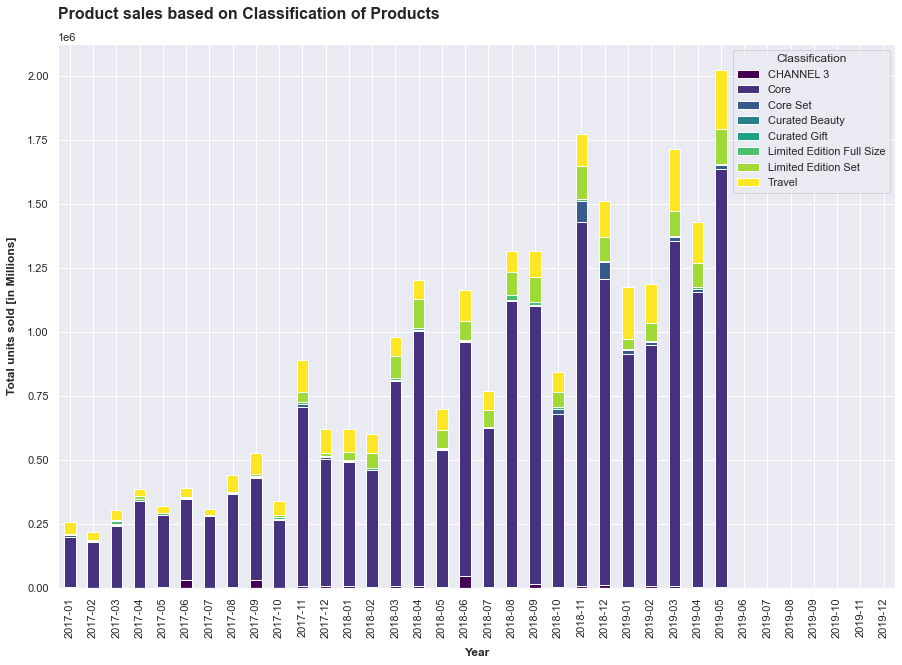

In [195]:
pd.crosstab(combined_df["Record Date"], combined_df["Classification"], 
            combined_df["Units"], aggfunc='sum').plot(kind='bar',
                                                      figsize=(15, 10), stacked=True,
                                                     colormap = 'viridis')
plt.xlabel('Year', fontsize = 12, fontweight='bold', labelpad=10)
plt.ylabel('Total units sold (in Mil)', fontsize = 12, fontweight='bold', labelpad=10)
plt.title('Product sales based on Classification of Products', loc='left', fontsize = 16, 
          fontweight='bold', pad= 25)
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [74]:
pd.crosstab(combined_df["Year"], combined_df["Classification"], combined_df["Units"], aggfunc='sum')

Classification,CHANNEL 3,Core,Core Set,Curated Beauty,Curated Gift,Limited Edition Full Size,Limited Edition Set,Travel
Year,,,,,,,,
2017,"87,906.703","4,052,003.480","47,171.000","10,819.000","1,269.000","58,022.000","92,407.000","656,267.000"
2018,"114,766.652","10,307,482.022","184,396.000","13,764.000","3,845.000","85,824.073","958,421.810","1,125,716.000"
2019,"22,597.000","5,985,097.000","66,731.000","5,334.000","1,301.000","21,387.000","440,087.000","981,954.000"


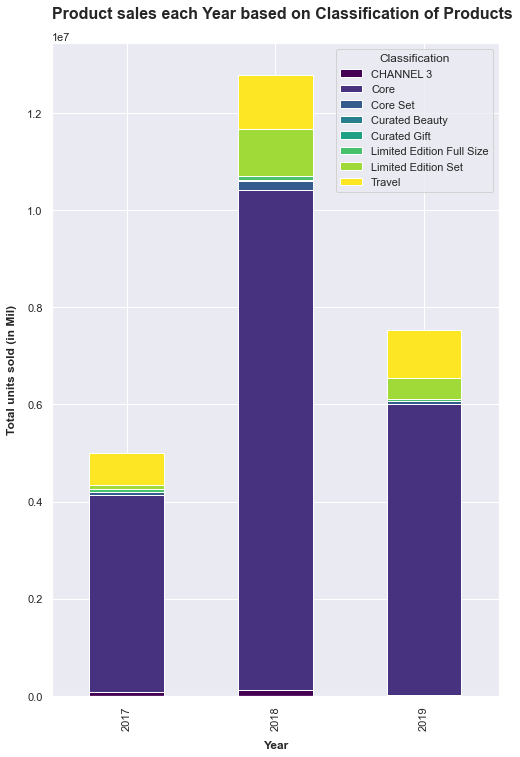

In [196]:
pd.crosstab(combined_df["Year"], combined_df["Classification"], 
            combined_df["Units"], aggfunc='sum').plot(kind='bar', 
                                                      figsize=(8, 12), stacked=True,
                                                     colormap = 'viridis')
plt.xlabel('Year', fontsize = 12, fontweight='bold', labelpad=10)
plt.ylabel('Total units sold (in Mil)', fontsize = 12, fontweight='bold', labelpad=10)
plt.title('Product sales each Year based on Classification of Products', loc='left', fontsize = 16, 
          fontweight='bold', pad= 25)
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [75]:
pd.crosstab(combined_df["Month"], combined_df["Classification"], combined_df["Units"], aggfunc='sum')

Classification,CHANNEL 3,Core,Core Set,Curated Beauty,Curated Gift,Limited Edition Full Size,Limited Edition Set,Travel
Month,,,,,,,,
1,"10,378.071","1,592,869.473","25,699.000","3,384.000",496.000,"8,375.000","73,878.000","338,181.000"
2,"10,698.000","1,574,822.000","19,705.000","1,890.000",239.000,"13,204.000","129,783.000","252,998.000"
3,"15,195.228","2,392,420.147","21,095.000","2,238.000",461.000,"25,053.000","184,280.000","356,882.000"
4,"9,516.000","2,490,842.000","11,475.000","2,424.000",583.000,"23,605.000","216,440.000","265,561.000"
5,"7,330.000","2,450,858.000","15,927.000","2,514.000",695.000,"15,153.000","207,109.000","341,274.000"
6,"78,172.735","1,228,339.199","2,847.000","2,832.000","1,348.000","7,913.000","75,151.000","156,872.000"
7,"3,719.172","902,426.865","1,091.000","1,170.000",376.000,"4,145.000","65,058.332","98,392.000"
8,"6,006.425","1,482,744.956","2,496.000","1,326.000",291.000,"21,181.072","94,136.478","149,570.000"
9,"45,942.000","1,482,674.000","4,138.000","3,444.000",374.000,"15,800.000","106,786.000","184,923.000"


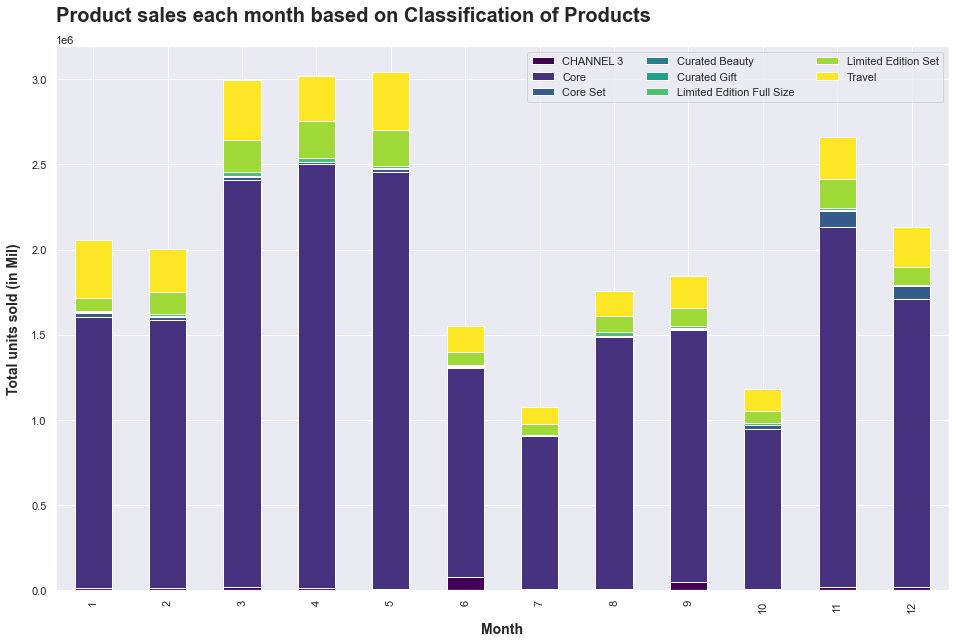

In [198]:
pd.crosstab(combined_df["Month"], combined_df["Classification"], 
            combined_df["Units"], aggfunc='sum').plot(kind='bar', 
                                                      figsize=(16, 10), stacked=True,
                                                      legend ='reverse',
                                                     colormap = 'viridis')
plt.legend(loc='upper right', ncol=3)
plt.xlabel('Month', fontsize = 14, fontweight='bold', labelpad=10)
plt.ylabel('Total units sold (in Mil)', fontsize = 14, fontweight='bold', labelpad=10)
plt.title('Product sales each month based on Classification of Products', loc='left', fontsize = 20, 
          fontweight='bold', pad= 25)

plt.yticks(ticks=np.arange(0, 3500000, 500000))
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [76]:
pd.crosstab(combined_df["Record Date"], combined_df["Subclass"], combined_df["Units"], aggfunc='sum')

Subclass,Blot,Body,Bridge,Bundle,Cleanser,Curated Beauty,Curated Gift,Eye,FS + TS GWP,Lip,Mask,Mist,Moisturizer,Oil,Powder,SPF,Serum,Set,TSV
Record Date,,,,,,,,,,,,,,,,,,,
2017-01,"22,396.000","8,898.000",NaN,546.000,"33,017.426","1,134.000",156.000,"7,834.000","1,808.071","13,586.000","12,206.000","34,702.000","16,088.000","4,924.000","36,140.000","6,269.000","49,222.047","9,474.000",0.000
2017-02,"18,952.000","12,432.000",NaN,570.000,"30,923.000",636.000,60.000,"6,354.000",597.000,"15,818.000","10,110.000","38,730.000","14,944.000","3,880.000","26,994.000","8,548.000","20,452.000","7,566.000",0.000
2017-03,"27,094.000","10,584.000",NaN,680.000,"40,252.466",894.000,90.000,"10,284.000","1,063.228","31,768.200","16,240.000","52,428.000","23,370.000","5,500.000","36,756.636","13,097.000","30,645.846","4,590.000",0.000
2017-04,"30,550.000","6,924.000",NaN,283.000,"52,706.000",306.000,12.000,"9,114.000",485.000,"36,680.000","16,910.000","54,882.000","87,260.000","3,862.000","38,454.000","11,731.000","37,167.000",545.000,0.000
2017-05,"23,814.000","8,052.000",NaN,"1,217.000","28,868.000",372.000,70.000,"7,822.000",448.000,"46,275.000","12,444.000","35,234.000","100,214.000","3,100.000","22,948.000","7,397.000","19,042.000","2,086.000",575.000
2017-06,"32,176.000","11,856.000",NaN,"5,076.079","41,908.940",528.000,211.000,"9,622.000",401.215,"28,123.000","14,009.000","40,112.000","67,603.000","4,550.000","29,653.000","19,260.000","58,094.042","1,961.256","25,542.159"
2017-07,"26,956.000","7,390.000",NaN,334.364,"38,570.840",234.000,57.000,"7,684.000",321.191,"17,944.000","12,695.000","69,170.000","56,969.470","5,426.000","25,288.000","9,828.000","28,721.200","1,088.000",7.000
2017-08,"26,790.000","9,183.000",NaN,"2,238.419","43,962.422",342.000,136.000,"7,476.000","1,289.191","42,142.993","12,803.000","92,336.000","83,425.794","4,754.000","35,502.000","5,243.000","71,834.125","1,252.000",321.808
2017-09,"31,438.000","8,810.000",NaN,"7,253.000","51,461.000","1,770.000",143.000,"12,814.000",401.000,"54,166.000","14,334.000","97,908.000","100,143.000","5,324.000","40,732.000","9,300.000","58,403.000","7,574.000","25,542.000"


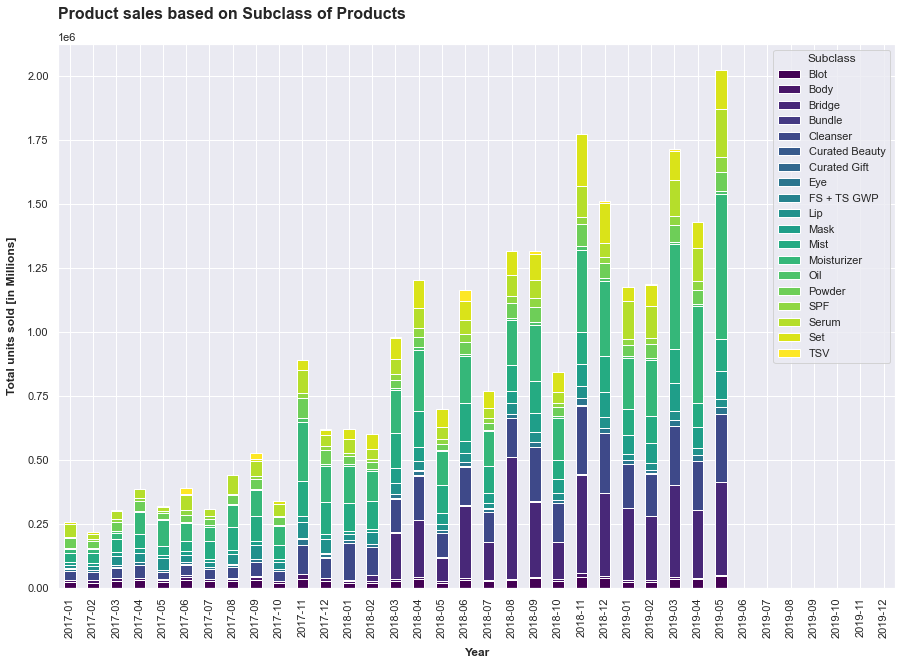

In [189]:
pd.crosstab(combined_df["Record Date"], combined_df["Subclass"], 
            combined_df["Units"], aggfunc='sum').plot(kind='bar', 
                                                      figsize=(15, 10), stacked=True,
                                                     colormap = 'viridis')
plt.xlabel('Year', fontsize = 12, fontweight='bold', labelpad=10)
plt.ylabel('Total units sold [in Millions]', fontsize = 12, fontweight='bold', labelpad=10)
plt.title('Product sales based on Subclass of Products', loc='left', fontsize = 16, 
          fontweight='bold', pad= 25)
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [77]:
pd.crosstab(combined_df["Year"], combined_df["Subclass"], combined_df["Units"], aggfunc='sum')

Subclass,Blot,Body,Bridge,Bundle,Cleanser,Curated Beauty,Curated Gift,Eye,FS + TS GWP,Lip,Mask,Mist,Moisturizer,Oil,Powder,SPF,Serum,Set,TSV
Year,,,,,,,,,,,,,,,,,,,
2017,"319,594.000","120,434.000",NaN,"23,450.803","588,680.844","10,819.000","1,269.000","124,808.000","9,949.730","432,980.649","173,662.000","835,546.000","993,923.533","68,124.000","458,671.636","131,512.000","551,845.274","102,942.994","57,651.720"
2018,"346,457.083","94,830.000","2,564,095.906","20,226.593","1,934,082.943","13,764.000","3,845.000","188,009.054","8,835.060","420,045.851","629,321.083","1,423,751.942","2,297,997.222","101,898.000","526,646.653","274,552.409","745,375.622","1,127,512.691","72,968.445"
2019,"161,462.000","32,424.000","1,515,740.000","7,023.000","1,016,649.000","5,334.000","1,301.000","98,812.000","1,371.000","138,031.000","454,004.000","566,274.000","1,775,033.000","44,050.000","290,752.000","173,905.000","729,354.000","504,909.000","8,060.000"


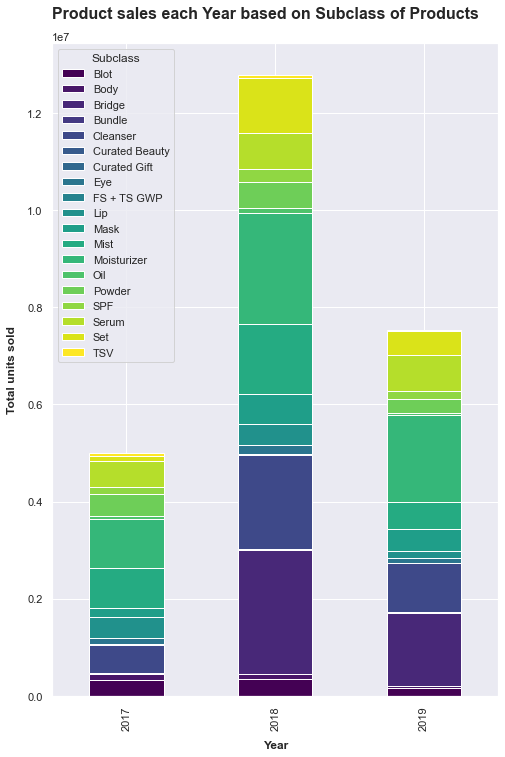

In [185]:
pd.crosstab(combined_df["Year"], combined_df["Subclass"], 
            combined_df["Units"], aggfunc='sum').plot(kind='bar', 
                                                      figsize=(8, 12), stacked=True,
                                                     colormap = 'viridis')
plt.xlabel('Year', fontsize = 12, fontweight='bold', labelpad=10)
plt.ylabel('Total units sold', fontsize = 12, fontweight='bold', labelpad=10)
plt.title('Product sales each Year based on Subclass of Products', loc='left', fontsize = 16, 
          fontweight='bold', pad= 25)
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [78]:
pd.crosstab(combined_df["Month"], combined_df["Subclass"], combined_df["Units"], aggfunc='sum')

Subclass,Blot,Body,Bridge,Bundle,Cleanser,Curated Beauty,Curated Gift,Eye,FS + TS GWP,Lip,Mask,Mist,Moisturizer,Oil,Powder,SPF,Serum,Set,TSV
Month,,,,,,,,,,,,,,,,,,,
1,"61,896.000","29,019.000","279,906.000","2,950.000","348,856.426","3,384.000",496.000,"32,868.000","2,963.071","58,600.000","98,213.000","250,184.000","359,414.000","21,012.000","109,892.000","40,000.000","252,185.047","100,081.000","1,341.000"
2,"61,224.000","27,491.000","271,271.000","4,457.000","305,342.000","1,890.000",239.000,"30,632.000","2,215.000","85,768.000","100,251.000","256,621.000","350,135.000","18,048.000","108,568.000","41,869.000","185,316.000","150,253.000","1,749.000"
3,"88,413.000","24,457.000","541,112.000","4,401.000","399,739.466","2,238.000",461.000,"48,952.000","1,808.228","110,152.200","185,013.000","322,800.000","600,770.000","22,842.000","136,315.636","70,445.000","225,525.846","204,242.000","7,937.000"
4,"98,964.000","20,965.000","485,120.000","4,315.000","414,466.000","2,424.000",583.000,"48,550.000","2,817.000","99,111.000","152,637.000","290,346.000","709,257.000","22,430.000","129,630.000","83,257.000","242,464.000","211,516.000","1,594.000"
5,"89,892.000","18,906.000","454,272.000","2,841.000","387,656.000","2,514.000",695.000,"45,720.000","1,293.000","99,648.000","161,591.000","272,641.000","798,944.000","20,616.000","121,231.000","81,693.000","257,254.000","221,500.000","1,953.000"
6,"61,814.000","21,169.000","279,101.198","10,291.875","190,666.134","2,832.000","1,348.000","26,988.000",673.437,"59,759.303","64,549.000","186,709.000","252,383.931","12,518.000","73,729.000","50,644.000","114,308.937","75,703.770","68,286.350"
7,"51,830.274","13,058.000","147,992.562","1,219.161","155,445.517","1,170.000",376.000,"19,276.596","1,921.032","38,213.890","53,751.289","171,554.889","193,297.590","10,700.000","51,605.864","31,407.796","67,168.996","65,983.686",405.227
8,"57,017.809","15,010.000","473,377.200","3,119.416","197,446.202","1,326.000",291.000,"21,192.458","1,702.192","83,269.674","61,629.794","193,608.053","258,865.030","11,400.000","96,816.750","29,671.613","154,517.439","96,503.486",987.814
9,"69,046.000","14,239.000","293,091.000","8,496.000","262,499.000","3,444.000",374.000,"32,184.000",678.000,"94,651.000","85,443.000","224,125.000","319,943.000","15,118.000","102,086.000","42,688.000","128,621.000","107,562.000","39,793.000"


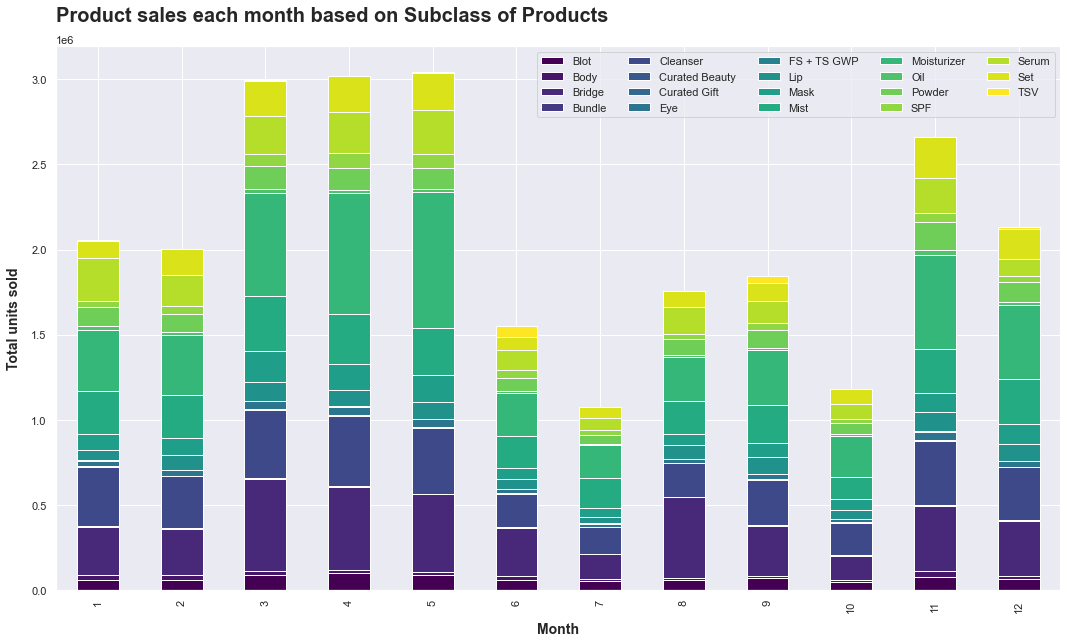

In [180]:
pd.crosstab(combined_df["Month"], combined_df["Subclass"], 
            combined_df["Units"], aggfunc='sum').plot(kind='bar', 
                                                      figsize=(18, 10), stacked=True,
                                                      legend ='reverse',
                                                     colormap = 'viridis')
plt.legend(loc='upper right', ncol=5)
plt.xlabel('Month', fontsize = 14, fontweight='bold', labelpad=10)
plt.ylabel('Total units sold', fontsize = 14, fontweight='bold', labelpad=10)
plt.title('Product sales each month based on Subclass of Products', loc='left', fontsize = 20, 
          fontweight='bold', pad= 25)

plt.yticks(ticks=np.arange(0, 3500000, 500000))
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [69]:
group_sku_n = combined_df.groupby(by=['Sku #', 'Sku'])

In [70]:
# Top-20 Products by total no. of units sold.
group_sku_n[['Units', 'COGS']].sum().sort_values(by='Units', ascending=False).head(20)

,,Units,COGS
Sku #,Sku,,
Sku 1,WATER-CREAM,"3,813,774.800","28,870,275.233"
Sku 2,SILK-CANVAS,"2,775,074.117","21,423,572.183"
Sku 10,SKIN-MIST,"1,730,416.000","9,745,858.781"
Sku 9,PC-OIL,"1,571,574.472","13,405,530.247"
Sku 7,DP-CLEANSE,"1,552,857.051","9,192,913.740"
Sku 6,ESSENCE,"1,108,355.623","8,339,256.604"
Sku 8,SEPH-BOTF-2018,"1,013,695.810","7,045,185.879"
Sku 16,DS-MASK,"844,158.155","680,222.642"
Sku 206,SKIN-MIST-TRAVEL,"803,292.000","4,008,510.712"


In [72]:
# Products which never got any sales:
group_sku_n[['Units', 'COGS']].sum().sort_values(by='Units', ascending=False).tail(35)

,,Units,COGS
Sku #,Sku,,
Sku 275,RURI-INDG-SCARF-CRTD,0.000,0.000
Sku 415,INDG-FACE-CREAM-V2,0.000,0.000
Sku 268,LE16-7DAY-BETA-Pre,0.000,0.000
Sku 260,HD15-YUKI-GIFT-SET-SENSITIVE,0.000,0.000
Sku 261,HIKARI-FAN,0.000,0.000
Sku 262,INDG-KYOTO-DUO,0.000,0.000
Sku 264,INDG-TOUMEI-DUO,0.000,0.000
Sku 266,KAISEKI-KIRI-SET,0.000,0.000
Sku 267,LE16-7DAY-ALPHA,0.000,0.000


In [73]:
# Top-20 Products by total COGS:
group_sku_n[['Units', 'COGS']].sum().sort_values(by='COGS', ascending=False).head(20)

,,Units,COGS
Sku #,Sku,,
Sku 1,WATER-CREAM,"3,813,774.800","28,870,275.233"
Sku 2,SILK-CANVAS,"2,775,074.117","21,423,572.183"
Sku 9,PC-OIL,"1,571,574.472","13,405,530.247"
Sku 10,SKIN-MIST,"1,730,416.000","9,745,858.781"
Sku 7,DP-CLEANSE,"1,552,857.051","9,192,913.740"
Sku 6,ESSENCE,"1,108,355.623","8,339,256.604"
Sku 8,SEPH-BOTF-2018,"1,013,695.810","7,045,185.879"
Sku 206,SKIN-MIST-TRAVEL,"803,292.000","4,008,510.712"
Sku 3,DS-CREAM,"498,540.000","3,499,750.800"


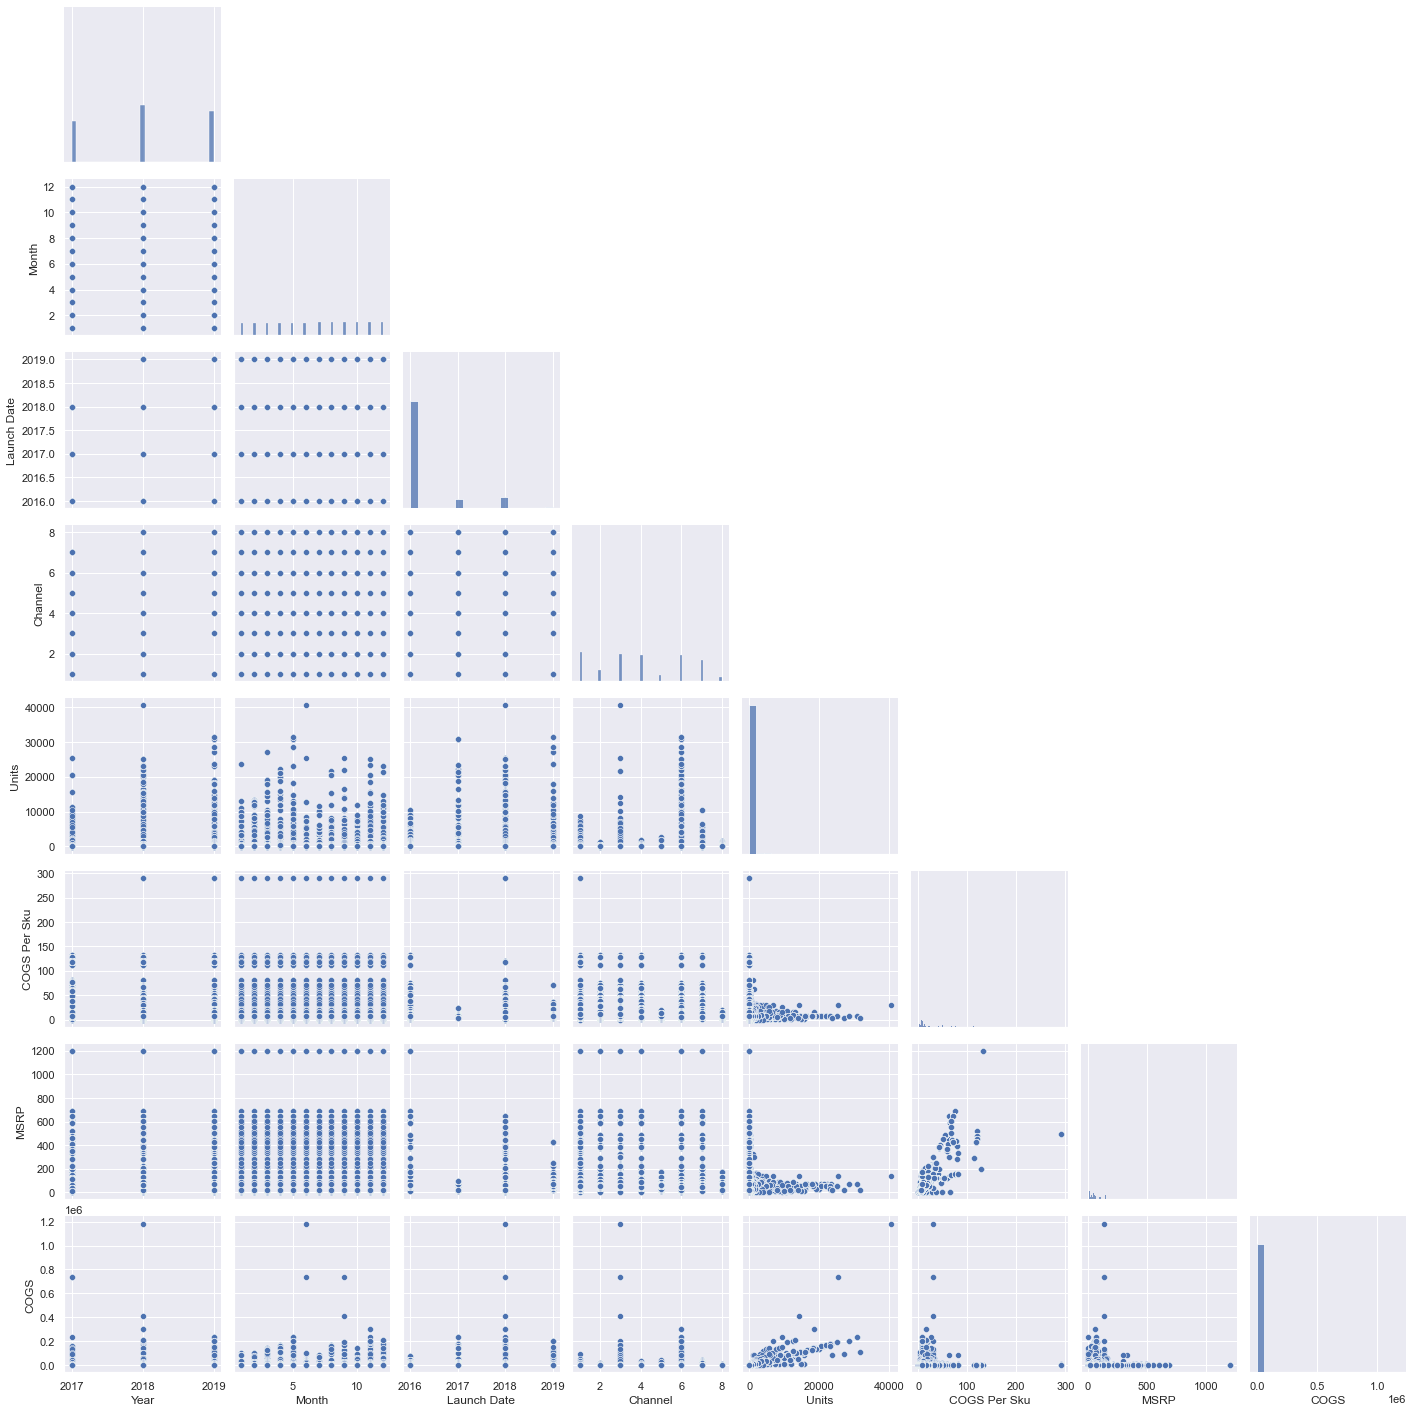

In [216]:
sns.pairplot(combined_df, corner=True)

<AxesSubplot:>

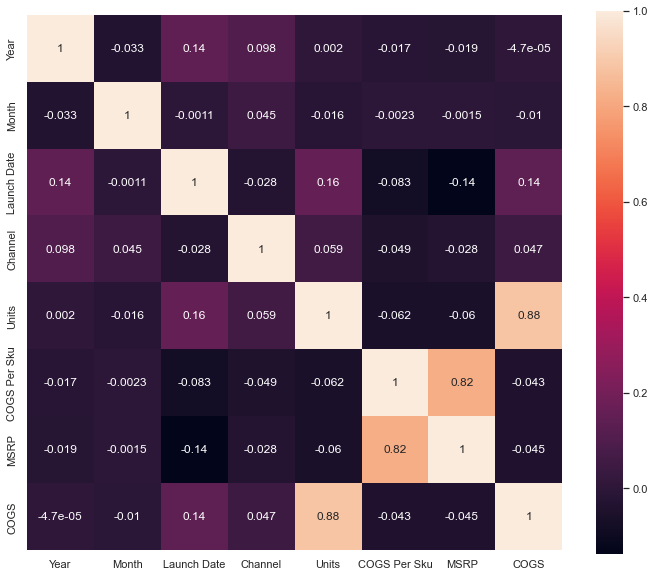

In [236]:
plt.subplots(figsize=(12,10))
sns.heatmap(combined_df.corr(), annot=True, square=True)

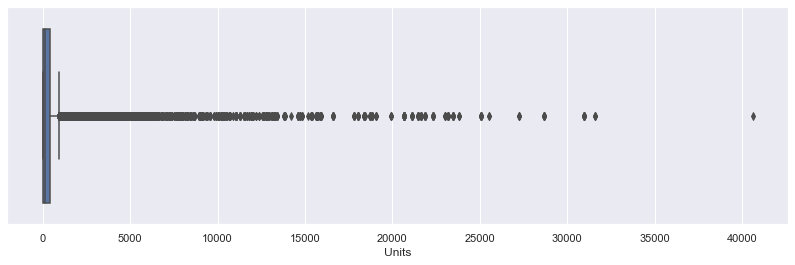

In [259]:
# Outliers in the units
plt.figure(figsize =(14, 4))
# Filtering out all the Zeroes.
sns.boxplot(combined_df['Units'][(combined_df['Units'] > 0)])
plt.show()
# As a large portion of the All Channel Sales data contains 0 values, 
# hence the concentration of central tendencies have shifted towards zero.

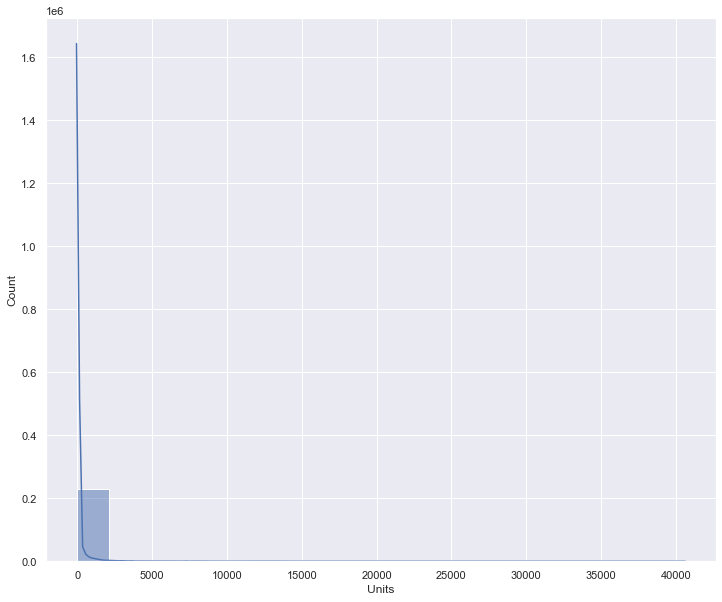

In [252]:
plt.subplots(figsize=(12,10))
sns.histplot(data=combined_df, x='Units', kde=True)
sns.set_theme(style='white')
sns.set_style("darkgrid")

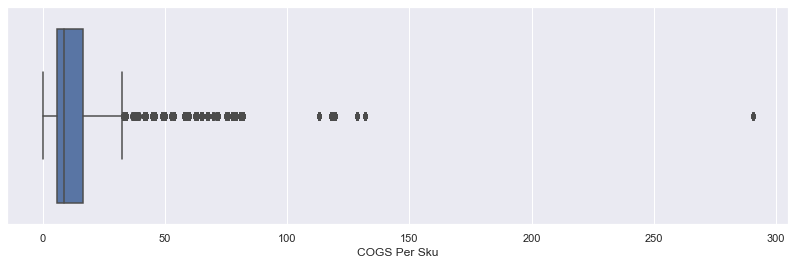

In [258]:
plt.figure(figsize =(14, 4))
# Filtering out all the Zeroes.
sns.boxplot(combined_df['COGS Per Sku'])
plt.show()

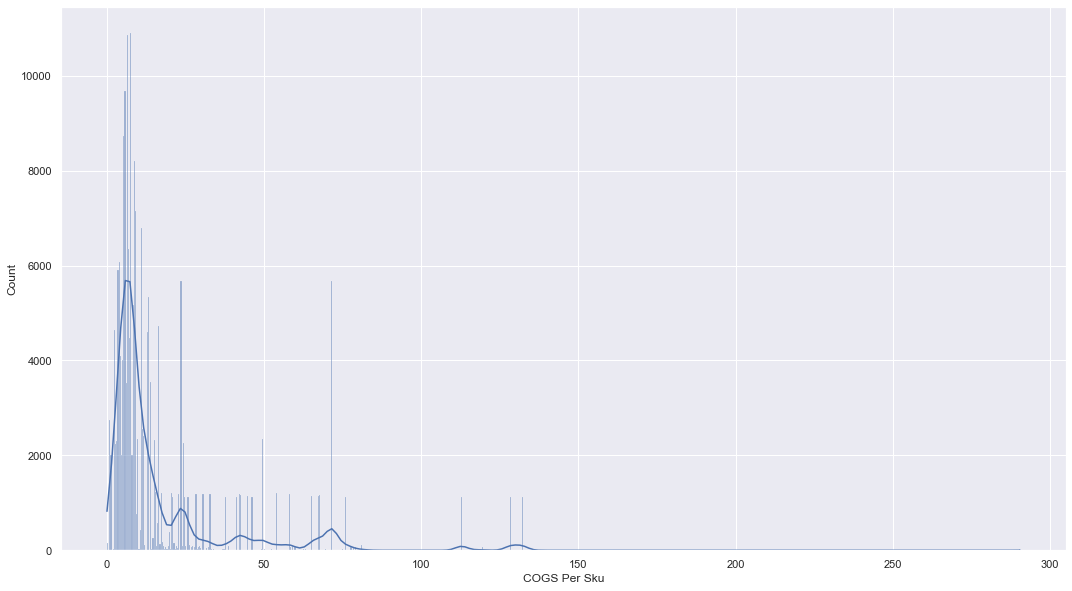

In [254]:
plt.subplots(figsize=(18,10))
sns.histplot(data=combined_df, x='COGS Per Sku', kde=True)
sns.set_theme(style='white')
sns.set_style("darkgrid")

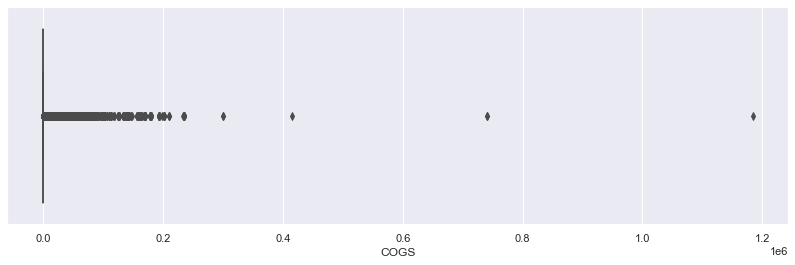

In [260]:
plt.figure(figsize =(14, 4))
# Filtering out all the Zeroes.
sns.boxplot(combined_df['COGS'])
plt.show()

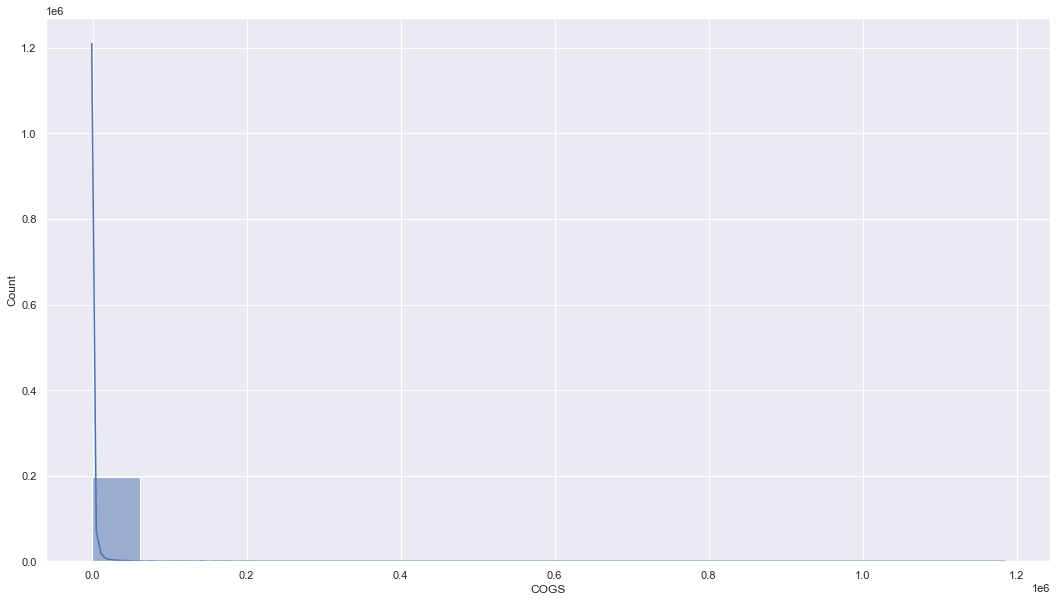

In [261]:
plt.subplots(figsize=(18,10))
sns.histplot(data=combined_df, x='COGS', kde=True)
sns.set_theme(style='white')
sns.set_style("darkgrid")

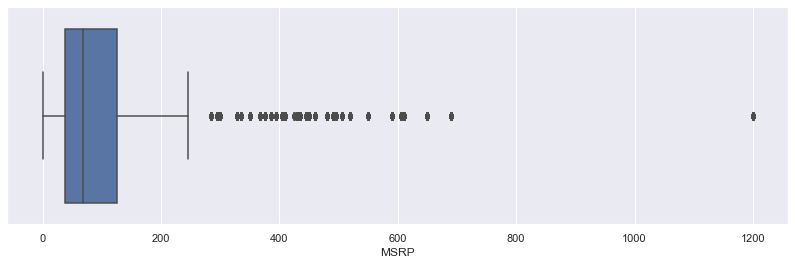

In [263]:
plt.figure(figsize =(14, 4))
# Filtering out all the Zeroes.
sns.boxplot(combined_df['MSRP'])
plt.show()

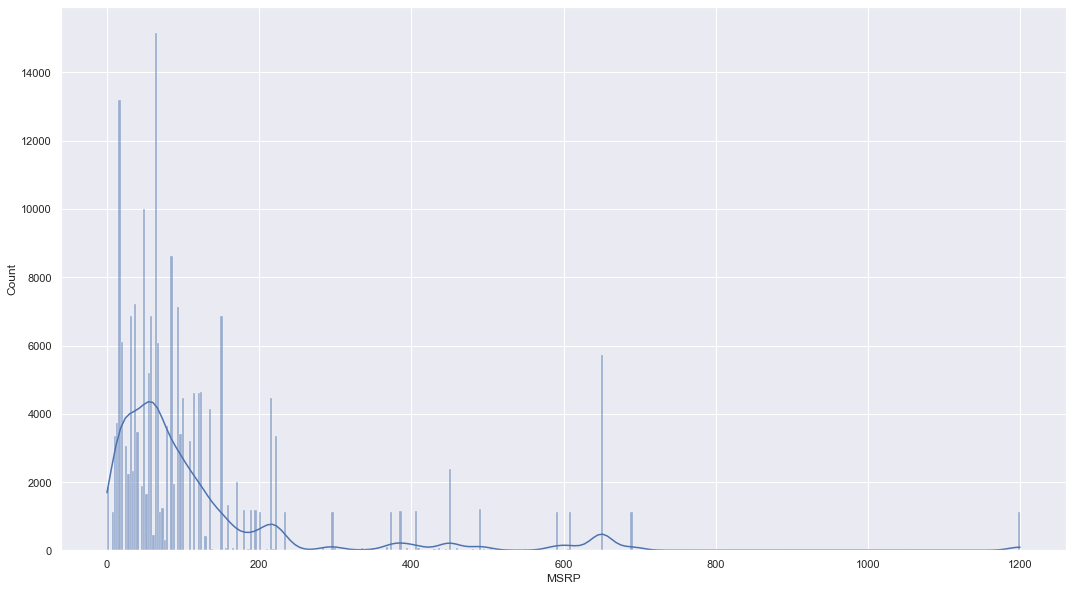

In [262]:
plt.subplots(figsize=(18,10))
sns.histplot(data=combined_df, x='MSRP', kde=True)
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [288]:
null_row_drop = combined_df[(combined_df['COGS Per Sku'].isna()) & (combined_df['Units'] == 0)].index
combined_df.drop(null_row_drop, inplace=True)

In [290]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200300 entries, 12 to 236531
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype    
---  ------          --------------   -----    
 0   Year            200300 non-null  int64    
 1   Month           200300 non-null  int64    
 2   Record Date     200300 non-null  period[M]
 3   Sku #           198558 non-null  object   
 4   Sku             200300 non-null  object   
 5   Merged Sku      200276 non-null  object   
 6   Launch Date     198558 non-null  float64  
 7   Classification  198558 non-null  object   
 8   Subclass        198558 non-null  object   
 9   Collection      198558 non-null  object   
 10  Channel         200300 non-null  int64    
 11  Units           200300 non-null  float64  
 12  COGS Per Sku    198558 non-null  float64  
 13  MSRP            198558 non-null  float64  
 14  Line Edit       198558 non-null  object   
 15  Region Name     198558 non-null  object   
 16  COGS            198

In [295]:
# Calculating the Net Sales Made:
print(f"Net Sales: {combined_df['Units'].sum()}")
# Calculating the Total COGS:
print(f"Total Cost of Goods Sold (COGS): {combined_df['COGS'].sum()}")

Net Sales: 26232097.617269002
Total Cost of Goods Sold (COGS): 175710429.48887235


In [294]:
combined_df.to_excel('Salesunit-Combined-All-Units.xlsx', index=False)

In [293]:
combined_df[combined_df['COGS Per Sku'].isna()]

,Year,Month,Record Date,Sku #,Sku,Merged Sku,Launch Date,Classification,Subclass,Collection,Channel,Units,COGS Per Sku,MSRP,Line Edit,Region Name,COGS
11090,2017,3,2017-03,NaN,SILK-CREAM-V2,SILK-CREAM-V2,NaN,NaN,NaN,NaN,3,"1,608.974",NaN,NaN,NaN,NaN,NaN
11091,2017,4,2017-04,NaN,SILK-CREAM-V2,SILK-CREAM-V2,NaN,NaN,NaN,NaN,3,184.000,NaN,NaN,NaN,NaN,NaN
11092,2017,5,2017-05,NaN,SILK-CREAM-V2,SILK-CREAM-V2,NaN,NaN,NaN,NaN,3,169.000,NaN,NaN,NaN,NaN,NaN
11093,2017,6,2017-06,NaN,SILK-CREAM-V2,SILK-CREAM-V2,NaN,NaN,NaN,NaN,3,742.000,NaN,NaN,NaN,NaN,NaN
11094,2017,7,2017-07,NaN,SILK-CREAM-V2,SILK-CREAM-V2,NaN,NaN,NaN,NaN,3,338.699,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234528,2019,1,2019-01,NaN,VIOLET-C-MASK,VIOLET-C-MASK,NaN,NaN,NaN,NaN,8,82.000,NaN,NaN,NaN,NaN,NaN
234529,2019,2,2019-02,NaN,VIOLET-C-MASK,VIOLET-C-MASK,NaN,NaN,NaN,NaN,8,93.000,NaN,NaN,NaN,NaN,NaN
234530,2019,3,2019-03,NaN,VIOLET-C-MASK,VIOLET-C-MASK,NaN,NaN,NaN,NaN,8,105.000,NaN,NaN,NaN,NaN,NaN
234531,2019,4,2019-04,NaN,VIOLET-C-MASK,VIOLET-C-MASK,NaN,NaN,NaN,NaN,8,294.000,NaN,NaN,NaN,NaN,NaN


In [296]:
null2_row_drop = combined_df[combined_df['COGS Per Sku'].isna()].index
combined_df.drop(null2_row_drop, inplace=True)

In [297]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198558 entries, 12 to 236531
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype    
---  ------          --------------   -----    
 0   Year            198558 non-null  int64    
 1   Month           198558 non-null  int64    
 2   Record Date     198558 non-null  period[M]
 3   Sku #           198558 non-null  object   
 4   Sku             198558 non-null  object   
 5   Merged Sku      198534 non-null  object   
 6   Launch Date     198558 non-null  float64  
 7   Classification  198558 non-null  object   
 8   Subclass        198558 non-null  object   
 9   Collection      198558 non-null  object   
 10  Channel         198558 non-null  int64    
 11  Units           198558 non-null  float64  
 12  COGS Per Sku    198558 non-null  float64  
 13  MSRP            198558 non-null  float64  
 14  Line Edit       198558 non-null  object   
 15  Region Name     198558 non-null  object   
 16  COGS            198

In [298]:
combined_df.to_excel('Salesunit-Combined-No-Missing-Vals.xlsx', index=False)